## Table of Contents
* [Loading datasets and libraries](#chapter0)
* [Study of datasets](#chapter00)
* [Feature engineering](#chapter1)
     * [Cohorts](#section_1_1)
     * [RFM](#section_1_2)
     * [Delivery Time](#section_1_3)
     * [Haversine distance](#section_1_3)
     * [Review Score](#section_1_4)
     * [Payment Installments](#section_1_5)
     * [Quantity of items](#section_1_6)
     * [Freight Ratio](#section_1_7)
     * [Product categories](#section_1_9)
 * [Merge and export datasets](#chapter_2)


# Lien vers la presentation

https://docs.google.com/presentation/d/1IJ3htMfe7Ks34KiZl_3iZ52nXF59oHtB_A38BntY6PM/edit?usp=sharing

# Loading datasets and libraries  <a class="anchor" id='chapter0'></a>

In [139]:
#import libraries

import os
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import requests # library to handle requests
from bs4 import BeautifulSoup # library to parse HTML documents
from math import radians, cos, sin, asin, sqrt

working_directory = os.getcwd()
print(working_directory)

/Users/jeaneudesdesgraviers/Downloads


In [140]:
#make path to read data files

path2 = working_directory + '/archive/olist_order_items_dataset.csv'
df2 = pd.read_csv(path2)

path3 = working_directory + '/archive/olist_orders_dataset.csv'
df3 = pd.read_csv(path3)

path4 = working_directory + '/archive/olist_customers_dataset.csv'
df4 = pd.read_csv(path4)

path6 = working_directory + '/archive/olist_order_reviews_dataset.csv'
df6 = pd.read_csv(path6)

path7 = working_directory + '/archive/product_category_name_translation.csv'
df7 = pd.read_csv(path7)

path8 = working_directory + '/archive/olist_products_dataset.csv'
df8 = pd.read_csv(path8)

path9 = working_directory + '/archive/olist_order_payments_dataset.csv'
df9 = pd.read_csv(path9)

path10 = working_directory + '/archive/olist_geolocation_dataset.csv'
df10 = pd.read_csv(path10)

# Study of datasets <a class="anchor" id='chapter00'></a>

In [141]:
#After watching all data files, merge datasets with features to be used

d1 = pd.merge(df3,df4, on ='customer_id')
d2 = pd.merge(df2,d1, on ='order_id')
d3 = pd.merge(d2,df6, on ='order_id')
d4 = pd.merge(d3,df9, on ='order_id')
d4

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,97ca439bc427b48bc1cd7177abe71365,5,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03,1,credit_card,2,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,...,7b07bacd811c4117b742569b04ce3580,4,NaN,NaN,2017-05-13 00:00:00,2017-05-15 11:34:13,1,credit_card,3,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,...,0c5b33dea94867d1ac402749e5438e8b,5,NaN,Chegou antes do prazo previsto e o produto sur...,2018-01-23 00:00:00,2018-01-23 16:06:31,1,credit_card,5,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,...,f4028d019cb58564807486a6aaf33817,4,NaN,NaN,2018-08-15 00:00:00,2018-08-15 16:39:01,1,credit_card,2,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,...,940144190dcba6351888cafa43f3a3a5,5,NaN,Gostei pois veio no prazo determinado .,2017-03-02 00:00:00,2017-03-03 10:54:59,1,credit_card,3,218.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117324,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,...,9185f849f32d82e216a4e025e0c50f5c,5,NaN,NaN,2018-05-11 00:00:00,2018-05-14 12:53:47,1,boleto,1,343.40
117325,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-14 10:26:46,...,be803f6a93d64719fd685c1cc610918a,5,NaN,NaN,2018-07-24 00:00:00,2018-07-25 09:25:29,1,boleto,1,386.53
117326,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,...,dbdd81cd59a1a9f94a10a990b4d48dce,5,NaN,NaN,2017-10-29 00:00:00,2017-10-29 21:33:52,1,credit_card,3,116.85
117327,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,...,fba117c9ac40d41ca7be54741f471303,5,NaN,Recebi o produto antes do prazo e corretamente.,2017-08-17 00:00:00,2017-08-18 12:24:05,1,credit_card,3,64.71


In [142]:
c1 = pd.merge(df7,df8, on ='product_category_name')
c2 = pd.merge(c1,d4, on ='product_id')
c2

#There are many product categories which will be hard to use for a segmentation if we need one category as one attribute
#Thus we won't use product categories as attributes

,product_category_name,product_category_name_english,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,...,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value
0,beleza_saude,health_beauty,e3e020af31d4d89d2602272b315c3f6e,58.0,1987.0,3.0,75.0,21.0,7.0,13.0,...,e40a00338817a7127bfbf45220c30e8c,4,NaN,NaN,2017-05-20 00:00:00,2017-05-21 11:38:19,1,credit_card,3,45.69
1,beleza_saude,health_beauty,c5d8079278e912d7e3b6beb48ecb56e8,60.0,330.0,1.0,1300.0,19.0,28.0,17.0,...,77bb6629f429afe0121776a1bba4f65f,5,NaN,NaN,2018-03-15 00:00:00,2018-03-16 03:26:29,1,credit_card,6,123.12
2,beleza_saude,health_beauty,c5d8079278e912d7e3b6beb48ecb56e8,60.0,330.0,1.0,1300.0,19.0,28.0,17.0,...,f3d50350bb91071856a1aa302d58c32d,4,NaN,NaN,2017-08-11 00:00:00,2017-08-15 11:41:14,1,credit_card,4,128.08
3,beleza_saude,health_beauty,36555a2f528d7b2a255c504191445d39,51.0,1069.0,1.0,1467.0,23.0,16.0,20.0,...,b5425a02e3804ec8cb2ef00f95cc501c,5,NaN,NaN,2018-02-22 00:00:00,2018-04-28 21:25:23,1,credit_card,2,46.01
4,beleza_saude,health_beauty,e586ebb6022265ae1eea38f46ffe3ead,40.0,1469.0,3.0,1050.0,18.0,21.0,27.0,...,d922c55fb82c5a62ceb8964747620fa5,5,NaN,NaN,2018-08-22 00:00:00,2018-08-25 03:35:38,1,credit_card,4,84.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115604,fashion_roupa_infanto_juvenil,fashion_childrens_clothes,57bdf3098169cccdb62221bd3e089cbd,38.0,168.0,1.0,100.0,16.0,16.0,16.0,...,549f0948d29acee5033f72e52f07dc8e,5,NaN,NaN,2017-10-17 00:00:00,2017-10-21 01:21:12,1,credit_card,1,54.09
115605,fashion_roupa_infanto_juvenil,fashion_childrens_clothes,57bdf3098169cccdb62221bd3e089cbd,38.0,168.0,1.0,100.0,16.0,16.0,16.0,...,048757148581cbd2c92bc96ca5d73211,5,NaN,NaN,2018-03-16 00:00:00,2018-03-19 09:12:20,1,credit_card,3,110.44
115606,fashion_roupa_infanto_juvenil,fashion_childrens_clothes,57bdf3098169cccdb62221bd3e089cbd,38.0,168.0,1.0,100.0,16.0,16.0,16.0,...,c4481ef5d41037c21d1b4a14d4eab656,5,NaN,NaN,2018-03-28 00:00:00,2018-03-29 11:16:27,1,boleto,1,106.43
115607,seguros_e_servicos,security_and_services,8db75af9aed3315374db44d7860e25da,48.0,461.0,4.0,400.0,26.0,22.0,11.0,...,1067a7f22781153115958799dc72a8df,1,NaN,"boa tarde produto enviado errado, terei que me...",2017-09-29 00:00:00,2017-09-30 20:49:37,1,boleto,1,115.45


In [143]:
#Only keep delivered articles and drop duplicates 
#df3.order_status.unique()

c2 = c2.loc[c2.order_status == "delivered",:]
c2.shape

(113210, 37)

In [144]:
c2.order_status.value_counts()

delivered    113210
Name: order_status, dtype: int64

<Axes: >

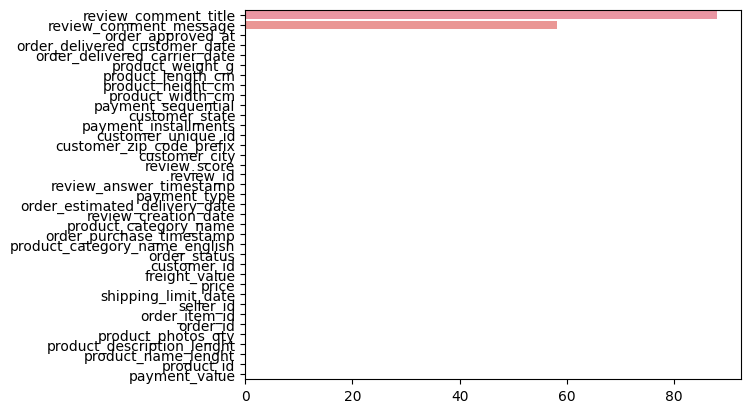

In [145]:
data_nan = c2.isna().sum().sort_values(ascending=False)

sns.barplot(x=data_nan.values /c2.shape[0]*100, y = data_nan.index)

In [146]:
#After having created cohorts, drop outliers based on datetime for better maintenance model later

c2.drop(c2.loc[c2['order_purchase_timestamp'] < '2017-01-01'].index, inplace=True)
c2.shape

/var/folders/gs/0bx6d0ms3jxfgjd6vfkz22l40000gn/T/ipykernel_742/3713330779.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



(112881, 37)

In [147]:
c2.columns

Index(['product_category_name', 'product_category_name_english', 'product_id',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'order_id', 'order_item_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')

In [148]:
c2.product_photos_qty.value_counts()

1.0     57049
2.0     22327
3.0     12569
4.0      8558
5.0      5450
6.0      3824
7.0      1519
8.0       747
10.0      345
9.0       300
11.0       70
12.0       59
13.0       30
15.0       11
17.0       11
14.0        6
18.0        4
19.0        1
20.0        1
Name: product_photos_qty, dtype: int64

In [149]:
c2.loc[:,['product_category_name_english','product_photos_qty','product_name_lenght','product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'order_id', 'order_item_id']]

,product_category_name_english,product_photos_qty,product_name_lenght,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,order_item_id
0,health_beauty,3.0,58.0,75.0,21.0,7.0,13.0,a41753c6a1d8accb89732e36243432d7,1
1,health_beauty,1.0,60.0,1300.0,19.0,28.0,17.0,6a1594b5f5cfc5bac6dcdc3f48f22b5e,1
2,health_beauty,1.0,60.0,1300.0,19.0,28.0,17.0,f6fbf7907913892ffc12ada3bff286ba,1
3,health_beauty,1.0,51.0,1467.0,23.0,16.0,20.0,a63144d37a00c28ef382668a5d5ece8b,1
4,health_beauty,3.0,40.0,1050.0,18.0,21.0,27.0,3ea7135b7064169abacfc10aa72f2e3a,1
...,...,...,...,...,...,...,...,...,...
115604,fashion_childrens_clothes,1.0,38.0,100.0,16.0,16.0,16.0,9fa3a005f89a187501fa1bd63d6125fb,1
115605,fashion_childrens_clothes,1.0,38.0,100.0,16.0,16.0,16.0,b99217b1fcf2fdeace7b8d869b76cb91,1
115606,fashion_childrens_clothes,1.0,38.0,100.0,16.0,16.0,16.0,bc3ac768a8963f4ca68942ea6558fc9f,1
115607,security_and_services,4.0,48.0,400.0,26.0,22.0,11.0,bede3503afed051733eeb4a84d1adcc5,1


In [150]:
c2.loc[:,['order_id','payment_sequential', 'payment_type',
       'payment_installments', 'payment_value']]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,a41753c6a1d8accb89732e36243432d7,1,credit_card,3,45.69
1,6a1594b5f5cfc5bac6dcdc3f48f22b5e,1,credit_card,6,123.12
2,f6fbf7907913892ffc12ada3bff286ba,1,credit_card,4,128.08
3,a63144d37a00c28ef382668a5d5ece8b,1,credit_card,2,46.01
4,3ea7135b7064169abacfc10aa72f2e3a,1,credit_card,4,84.54
...,...,...,...,...,...
115604,9fa3a005f89a187501fa1bd63d6125fb,1,credit_card,1,54.09
115605,b99217b1fcf2fdeace7b8d869b76cb91,1,credit_card,3,110.44
115606,bc3ac768a8963f4ca68942ea6558fc9f,1,boleto,1,106.43
115607,bede3503afed051733eeb4a84d1adcc5,1,boleto,1,115.45


In [151]:
c2.payment_installments.value_counts()

1     56291
2     13122
3     11276
4      7673
10     6582
5      5788
8      4874
6      4436
7      1727
9       692
12      161
15       88
18       38
24       34
11       22
20       19
13       18
14       15
17        7
16        7
21        6
0         3
23        1
22        1
Name: payment_installments, dtype: int64

In [152]:
c2.loc[c2.payment_installments == 23,['order_id','payment_sequential', 'payment_type',
       'payment_installments', 'payment_value']]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
65706,657092a7391a08ae27775a441765b3bc,1,credit_card,23,236.48


# Feature engineering <a class="anchor" id='chapter1'></a>

# Cohorts <a class="anchor" id='section_1_1' ></a>


In [153]:
#Creating Cohorts and visualization

#Change format for manipulation
c2['order_purchase_timestamp'] = pd.to_datetime(c2['order_purchase_timestamp'])

#Creating monthly Cohorts based on the first purchase of each unique client
def get_month(x): 
    return dt.datetime(x.year, x.month, 1)

c2['Purchase_Month'] = c2['order_purchase_timestamp'].apply(get_month)
grouping = c2.groupby('customer_unique_id')['Purchase_Month']
c2['Cohort_Month'] = grouping.transform('min')

#Creating Cohort Index for visualization

def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

invoice_year, invoice_month, _ = get_date_int(c2, 'Purchase_Month')
cohort_year, cohort_month, _ = get_date_int(c2, 'Cohort_Month')
years_diff = invoice_year - cohort_year
months_diff = invoice_month - cohort_month
c2['CohortIndex'] = years_diff * 12 + months_diff + 1

grouping = c2.groupby(['Cohort_Month', 'CohortIndex'])
cohort_data = grouping['customer_unique_id'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(index = 'Cohort_Month', columns = 'CohortIndex',
                                  values='customer_unique_id')
cohort_counts

/var/folders/gs/0bx6d0ms3jxfgjd6vfkz22l40000gn/T/ipykernel_742/1092385492.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/gs/0bx6d0ms3jxfgjd6vfkz22l40000gn/T/ipykernel_742/1092385492.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/gs/0bx6d0ms3jxfgjd6vfkz22l40000gn/T/ipykernel_742/1092385492.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,20
Cohort_Month,,,,,,,,,,,,,,,,,,,
2017-01-01,700.0,2.0,2.0,1.0,3.0,1.0,3.0,1.0,NaN,NaN,3.0,1.0,4.0,3.0,1.0,1.0,2.0,3.0,1.0
2017-02-01,1571.0,3.0,5.0,1.0,7.0,2.0,4.0,3.0,2.0,3.0,2.0,5.0,2.0,3.0,2.0,1.0,1.0,3.0,NaN
2017-03-01,2438.0,11.0,9.0,9.0,9.0,4.0,4.0,8.0,8.0,2.0,8.0,3.0,5.0,3.0,4.0,6.0,2.0,3.0,NaN
2017-04-01,2183.0,14.0,5.0,4.0,6.0,6.0,7.0,7.0,7.0,4.0,6.0,2.0,1.0,1.0,2.0,2.0,3.0,NaN,NaN
2017-05-01,3348.0,16.0,15.0,10.0,9.0,11.0,14.0,5.0,7.0,8.0,9.0,9.0,8.0,1.0,5.0,7.0,NaN,NaN,NaN
2017-06-01,2963.0,15.0,11.0,11.0,9.0,11.0,10.0,6.0,4.0,5.0,9.0,10.0,5.0,5.0,7.0,NaN,NaN,NaN,NaN
2017-07-01,3679.0,20.0,12.0,9.0,10.0,8.0,11.0,4.0,7.0,10.0,8.0,11.0,5.0,9.0,NaN,NaN,NaN,NaN,NaN
2017-08-01,3972.0,27.0,14.0,11.0,13.0,21.0,11.0,10.0,6.0,6.0,10.0,7.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01,3923.0,27.0,20.0,11.0,18.0,8.0,9.0,10.0,11.0,8.0,10.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# RFM <a class="anchor" id='section_1_2' ></a>

In [154]:
#For marketing purposes, creating 'Recency', 'Frequency' and 'Monetary' class - RFM

snapshot_date = max(c2.order_purchase_timestamp) + dt.timedelta(days=1)

RFM_df = c2.groupby(['customer_unique_id']).agg({'order_purchase_timestamp' : lambda x: (snapshot_date - x.max()).days,
                                               'order_id' : 'count',
                                                'price' : 'sum'})
RFM_df.rename(columns = {'order_purchase_timestamp': 'Recency',
                                               'order_id' : 'Frequency',
                                                'price' : 'Monetary'}, inplace = True)
RFM_df.describe()

,Recency,Frequency,Monetary
count,91233.000000,91233.000000,91233.000000
mean,235.872437,1.237283,148.291558
std,150.937092,0.844061,243.869463
min,1.000000,1.000000,0.850000
25%,113.000000,1.000000,48.900000
50%,217.000000,1.000000,89.900000
75%,344.000000,1.000000,159.900000
max,602.000000,75.000000,13440.000000


In [155]:
#RFM Score
#distinguish class with quartile segmentation or based on observations

#R
r_labels = range(3,0, -1)
r_quartiles = pd.qcut(RFM_df['Recency'], 3, labels = r_labels)
RFM_df = RFM_df.assign(R = r_quartiles.values)

#F
def assign_f_score(row):
    if row['Frequency'] == 1:
        return 1
    elif row['Frequency'] == 2:
        return 2
    else : 
        return 3
    
RFM_df['F'] = RFM_df.apply(lambda row: assign_f_score(row), axis=1)

#M
m_labels = range(1,4)
m_quartiles = pd.qcut(RFM_df['Monetary'], 3, labels = m_labels)
RFM_df = RFM_df.assign(M = m_quartiles.values)

#RFM_df
def change_RFM_dtype(df, features):
    for feature in features:
        df[feature] = df[feature].astype('int')

change_RFM_dtype(RFM_df,['R','F','M'])
RFM_df

,Recency,Frequency,Monetary,R,F,M
customer_unique_id,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,112,1,129.90,3,1,2
0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,18.90,3,1,1
0000f46a3911fa3c0805444483337064,537,1,69.00,1,1,2
0000f6ccb0745a6a4b88665a16c9f078,321,1,25.99,1,1,1
0004aac84e0df4da2b147fca70cf8255,288,1,180.00,2,1,3
...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,447,2,1570.00,1,2,3
fffea47cd6d3cc0a88bd621562a9d061,262,1,64.89,2,1,2
ffff371b4d645b6ecea244b27531430a,568,1,89.90,1,1,2


In [156]:
#RFM Score

def join_rfm(x):
    return str(int(x['R'])) + str(int(x['F'])) + str(int(x['M']))
RFM_df['RFM_Segment'] = RFM_df.apply(join_rfm, axis=1)
RFM_df['RFM_Score'] = RFM_df[['R','F','M']].sum(axis=1)

RFM_df.groupby('RFM_Segment').agg({'Recency':'mean','Frequency':'mean','Monetary':['mean','count']}).round(1)


Recency Frequency Monetary      
               mean      mean     mean count
RFM_Segment                                 
111           415.5       1.0     34.8  9304
112           415.0       1.0     88.8  8970
113           413.5       1.0    308.4  7456
121           421.0       2.0     40.0   595
122           408.0       2.0     94.6  1166
123           414.0       2.0    341.8  1635
131           421.5       4.0     42.6    58
132           414.2       3.5     95.9   240
133           406.7       4.4    496.9   944
211           218.5       1.0     35.5  9915
212           220.0       1.0     91.2  8489
213           218.1       1.0    285.9  7417
221           216.7       2.0     40.3   486
222           219.4       2.0     94.2  1057
223           218.6       2.0    308.3  1756
231           217.4       3.4     43.1    70
232           222.6       3.5     98.4   257
233           218.5       4.3    425.4   926
311            73.6       1.0     35.2  9448
312            74.9       1.0     92.4  9092
313            76.0       1.0    305.6  7451
321            75.6       2.0     40.6   472
322            78.8       2.0     91.5  1056
323            76.0       2.0    322.1  1769
331            78.5       3.5     40.7    66
332            73.2       3.5     97.4   242
333            77.7       4.3    480.3   896

In [157]:
#Characterize segments
seg_map = {
    r'333': 'champion',
    r'33[1-2]': 'loyal',
    r'32[1-3]': 'potential_loyalist',
    r'31[1-3]': 'new_customers',
    r'2[1-3]3': 'sleeping_big_wallet',
    r'2[1-3][1-2]': 'need_attention',
    r'1[2-3][1-3]': 'lost_loyal',
    r'11[3]': 'lost_occasionnal_big_wallet',
    r'11[1-2]': 'lost_occasionnal',
}

RFM_df['Title'] = RFM_df['RFM_Segment'].replace(seg_map, regex=True)
RFM_df.reset_index(inplace=True)

segments_count = RFM_df.groupby("Title").agg({"customer_unique_id": "count"})
segments_count.reset_index(inplace=True)
segments_count.columns = ['segment', 'count']
segments_count.sort_values(by=["count"], ascending = False)

,segment,count
6,new_customers,25991
5,need_attention,20274
2,lost_occasionnal,18274
8,sleeping_big_wallet,10099
3,lost_occasionnal_big_wallet,7456
1,lost_loyal,4638
7,potential_loyalist,3297
0,champion,896
4,loyal,308


In [158]:
#Visualizing RFM segmentation with tree map
px.treemap(segments_count, path=[px.Constant("segment"), "segment"], values='count',
                 color='count', hover_data=['count'], 
                 color_continuous_scale='RdBu',
                 color_continuous_midpoint=np.average(segments_count['count'], weights=segments_count['count']))

# Delivery Time <a class="anchor" id='section_1_3' ></a>

In [159]:
# Extracting delivery time variable for modelisation

c2[['order_delivered_customer_date','order_purchase_timestamp']] = c2[['order_delivered_customer_date','order_purchase_timestamp']].apply(pd.to_datetime) #if conversion required
c2['time_delivery'] = (c2['order_delivered_customer_date'] - c2['order_purchase_timestamp']).dt.days + 1
delivery_df = c2.groupby(['customer_unique_id']).agg({'time_delivery' : lambda x: x.mean()})
delivery_df

/var/folders/gs/0bx6d0ms3jxfgjd6vfkz22l40000gn/T/ipykernel_742/1484544254.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/gs/0bx6d0ms3jxfgjd6vfkz22l40000gn/T/ipykernel_742/1484544254.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,time_delivery
customer_unique_id,
0000366f3b9a7992bf8c76cfdf3221e2,7.0
0000b849f77a49e4a4ce2b2a4ca5be3f,4.0
0000f46a3911fa3c0805444483337064,26.0
0000f6ccb0745a6a4b88665a16c9f078,21.0
0004aac84e0df4da2b147fca70cf8255,14.0
...,...
fffcf5a5ff07b0908bd4e2dbc735a684,28.0
fffea47cd6d3cc0a88bd621562a9d061,31.0
ffff371b4d645b6ecea244b27531430a,15.0


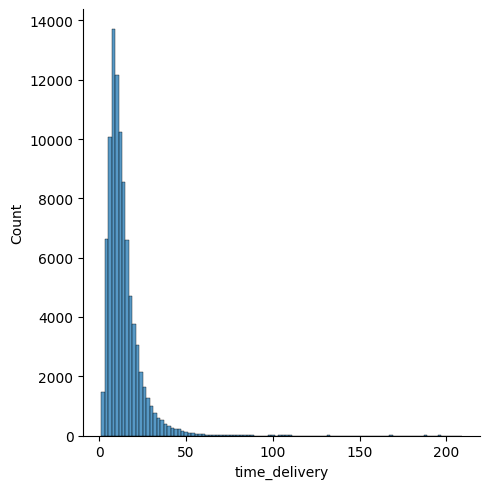

In [160]:
sns.displot(delivery_df, x="time_delivery", binwidth=2)

# Haversine distance <a class="anchor" id='section_1_4' ></a>

In [161]:
wikiurl="https://en.wikipedia.org/wiki/Federative_units_of_Brazil"
table_class="wikitable sortable jquery-tablesorter"
response=requests.get(wikiurl)
print(response.status_code)

200


In [162]:
# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(response.text, 'html.parser')
Brasiltable=soup.find('table',{'class':"wikitable"})

In [163]:
brasil_df=pd.read_html(str(Brasiltable))
# convert list to dataframe
brasil_df=pd.DataFrame(brasil_df[0]).set_index("Code")
brasil_df.head()

,Flag and name,Capital,Largest city,Area (km2)[20],Population (February 2023)[21],"Density (per km2, 2022)","GDP (R$ millions, 2022)[22]",HDI (2022)[23]
Code,,,,,,,,
AC,Acre,Rio Branco,Rio Branco,164123,916000,6.34,21000,0.719
AL,Alagoas,Maceió,Maceió,27779,3383000,125.52,73000,0.683
AP,Amapá,Macapá,Macapá,142829,873000,2.63,9000,0.740
AM,Amazonas,Manaus,Manaus,1559159,4226000,2.58,103000,0.733
BA,Bahia,Salvador,Salvador,564733,15063000,30.52,257000,0.714


In [164]:
c2 = pd.merge(c2.reset_index(), brasil_df[["Flag and name"]],
                how="left",
                left_on="customer_state",
                right_on="Code")
c2.drop("customer_state", axis=1, inplace=True)
c2 = c2.rename(columns={"Flag and name": "customer_state"})

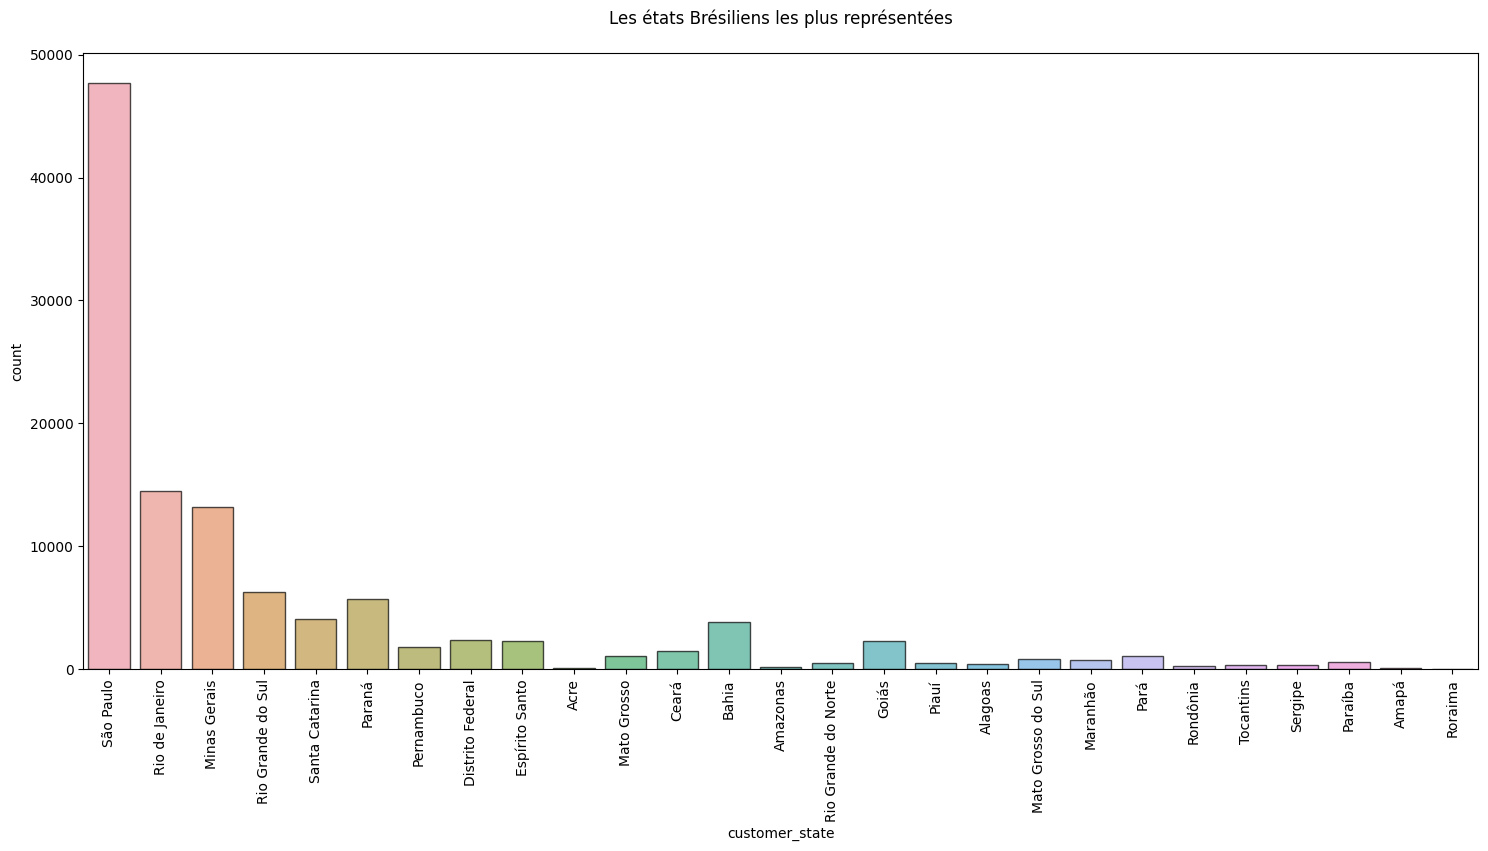

In [165]:
# Countplot of states repartition
fig = plt.figure(figsize=(18, 8))
sns.countplot(data=c2, x="customer_state",
              edgecolor="black",
              alpha=0.7)
plt.xticks(range(0, c2["customer_state"].nunique()),
           c2["customer_state"].unique(),
           rotation=90)
plt.title(f"Les états Brésiliens les plus représentées\n")
plt.show()

São Paulo              47712
Rio de Janeiro         14514
Minas Gerais           13175
Rio Grande do Sul       6296
Paraná                  5758
Santa Catarina          4129
Bahia                   3841
Distrito Federal        2389
Goiás                   2298
Espírito Santo          2265
Pernambuco              1789
Ceará                   1475
Mato Grosso             1058
Pará                    1050
Mato Grosso do Sul       837
Maranhão                 800
Paraíba                  604
Rio Grande do Norte      548
Piauí                    540
Alagoas                  437
Sergipe                  379
Tocantins                329
Rondônia                 274
Amazonas                 167
Acre                      92
Amapá                     82
Roraima                   43
Name: customer_state, dtype: int64


<Axes: title={'center': 'Distribution par Localisation'}, ylabel='customer_state'>

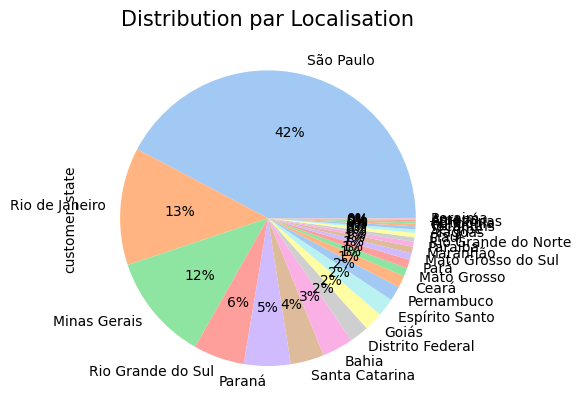

In [166]:
reviews = c2.loc[:,'customer_state']

# series of counts
review_count = reviews.value_counts()
# print the counts
print(review_count)
plt.title('Distribution par Localisation', fontsize = 15)

review_count.plot(kind='pie', colors = sns.color_palette('pastel'), autopct='%.0f%%')

In [167]:
state_location = df10.groupby("geolocation_state").mean()
state_location = pd.merge(brasil_df[["Flag and name"]].reset_index(), 
                          state_location, 
                          right_on="geolocation_state", 
                          left_on="Code", 
                          how="left")
state_location = state_location[["Flag and name", "geolocation_lat", "geolocation_lng"]]

# Olist location
olist_lat = -25.43045
olist_lon = -49.29207

/var/folders/gs/0bx6d0ms3jxfgjd6vfkz22l40000gn/T/ipykernel_742/453853137.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [168]:
def haversine_distance(lat1, lng1, lat2, lng2, degrees=True):
    r = 3956 # rayon de la Terre en miles
    
    if degrees:
        lat1, lng1, lat2, lng2 = map(radians, [lat1, lng1, lat2, lng2])
    
    # Formule Haversine
    dlng = lng2 - lng1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlng/2)**2
    d = 2 * r * asin(sqrt(a))  

    return d

In [169]:
# Haversine distance between centre state and Olist office
state_location['haversine_distance'] = [haversine_distance(olist_lat, olist_lon, x, y) 
                              for x, y in zip(state_location.geolocation_lat, 
                                              state_location.geolocation_lng)]

In [170]:
c2 = pd.merge(c2, state_location[["Flag and name", "haversine_distance"]],
         how="left",
         left_on="customer_state",
         right_on="Flag and name")
c2.drop("index", axis=1, inplace=True)
c2.set_index("customer_unique_id", inplace=True)
c2.head(3)

,product_category_name,product_category_name_english,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,...,payment_type,payment_installments,payment_value,Purchase_Month,Cohort_Month,CohortIndex,time_delivery,customer_state,Flag and name,haversine_distance
customer_unique_id,,,,,,,,,,,,,,,,,,,,,
dc83fe8f72fb4388f079a2f9b586240c,beleza_saude,health_beauty,e3e020af31d4d89d2602272b315c3f6e,58.0,1987.0,3.0,75.0,21.0,7.0,13.0,...,credit_card,3,45.69,2017-05-01,2017-05-01,1,8.0,São Paulo,São Paulo,209.713834
ba0a84d4272f023846c748fd2eb76ffd,beleza_saude,health_beauty,c5d8079278e912d7e3b6beb48ecb56e8,60.0,330.0,1.0,1300.0,19.0,28.0,17.0,...,credit_card,6,123.12,2018-03-01,2018-03-01,1,8.0,Rio de Janeiro,Rio de Janeiro,428.916514
46e277a4bd2d4bf3e0e8cfaf4ea3c41b,beleza_saude,health_beauty,c5d8079278e912d7e3b6beb48ecb56e8,60.0,330.0,1.0,1300.0,19.0,28.0,17.0,...,credit_card,4,128.08,2017-07-01,2017-07-01,1,11.0,Minas Gerais,Minas Gerais,493.836401


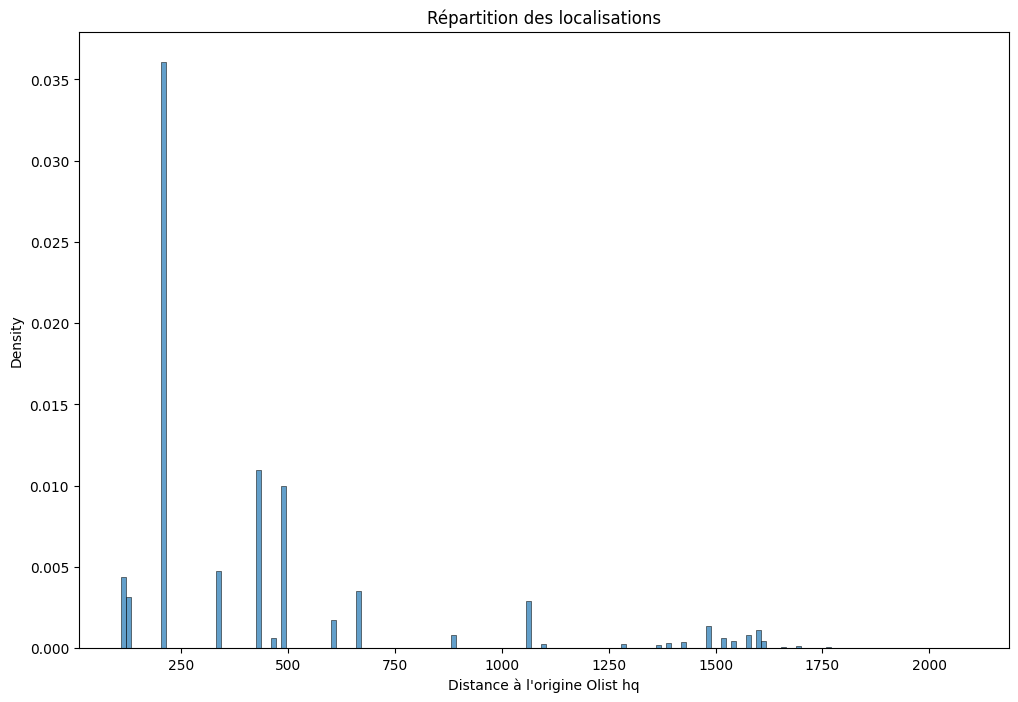

In [171]:
fig = plt.figure(figsize=(12, 8))
sns.histplot(data=c2, x="haversine_distance",
             stat="density",
             edgecolor="black", alpha=0.7)
plt.xlabel("Distance à l'origine Olist hq")
plt.title(f"Répartition des localisations")
plt.show()

In [172]:
c2.haversine_distance.describe()

count    112881.000000
mean        433.432268
std         372.582853
min         108.557249
25%         209.713834
50%         209.713834
75%         493.836401
max        2087.340387
Name: haversine_distance, dtype: float64

In [173]:
df_haversine = c2.groupby(['customer_unique_id']).agg({'haversine_distance' : lambda x: x.max()})
df_haversine

,haversine_distance
customer_unique_id,
0000366f3b9a7992bf8c76cfdf3221e2,209.713834
0000b849f77a49e4a4ce2b2a4ca5be3f,209.713834
0000f46a3911fa3c0805444483337064,125.363853
0000f6ccb0745a6a4b88665a16c9f078,1574.231129
0004aac84e0df4da2b147fca70cf8255,209.713834
...,...
fffcf5a5ff07b0908bd4e2dbc735a684,1486.897041
fffea47cd6d3cc0a88bd621562a9d061,1063.469329
ffff371b4d645b6ecea244b27531430a,882.561907


# Review score <a class="anchor" id='section_1_5' ></a>

In [174]:
# Extracting review score variable for modelisation

df_score = c2.groupby(['customer_unique_id']).agg({'review_score' : lambda x: x.mean()})
df_score

,review_score
customer_unique_id,
0000366f3b9a7992bf8c76cfdf3221e2,5.0
0000b849f77a49e4a4ce2b2a4ca5be3f,4.0
0000f46a3911fa3c0805444483337064,3.0
0000f6ccb0745a6a4b88665a16c9f078,4.0
0004aac84e0df4da2b147fca70cf8255,5.0
...,...
fffcf5a5ff07b0908bd4e2dbc735a684,5.0
fffea47cd6d3cc0a88bd621562a9d061,4.0
ffff371b4d645b6ecea244b27531430a,5.0


5    64978
4    21760
1    12810
3     9506
2     3827
Name: review_score, dtype: int64


<Axes: title={'center': 'Distribution par review score'}, ylabel='review_score'>

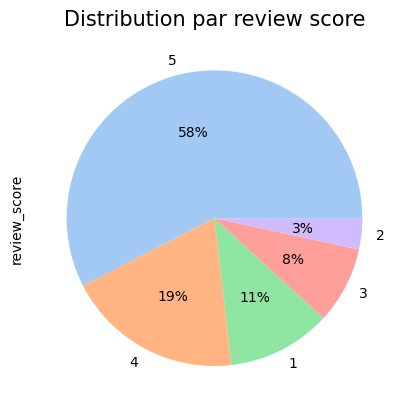

In [175]:
reviews = c2.loc[:,'review_score']

# series of counts
review_count = reviews.value_counts()
# print the counts
print(review_count)
plt.title('Distribution par review score', fontsize = 15)

review_count.plot(kind='pie', colors = sns.color_palette('pastel'), autopct='%.0f%%')

# Payment installments <a class="anchor" id='section_1_6' ></a>

In [176]:
df_installments = c2.groupby(['customer_unique_id']).agg({'payment_installments' : lambda x: x.mean()})
df_installments

,payment_installments
customer_unique_id,
0000366f3b9a7992bf8c76cfdf3221e2,8.0
0000b849f77a49e4a4ce2b2a4ca5be3f,1.0
0000f46a3911fa3c0805444483337064,8.0
0000f6ccb0745a6a4b88665a16c9f078,4.0
0004aac84e0df4da2b147fca70cf8255,6.0
...,...
fffcf5a5ff07b0908bd4e2dbc735a684,10.0
fffea47cd6d3cc0a88bd621562a9d061,1.0
ffff371b4d645b6ecea244b27531430a,1.0


In [177]:
# Add a value to all for the log transformation

#df_installments.loc[df_installments['payment_installments'] == 0 , 'payment_installments'] = 1

In [178]:
df_installments.describe()

,payment_installments
count,91233.000000
mean,2.901116
std,2.678363
min,0.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,24.000000


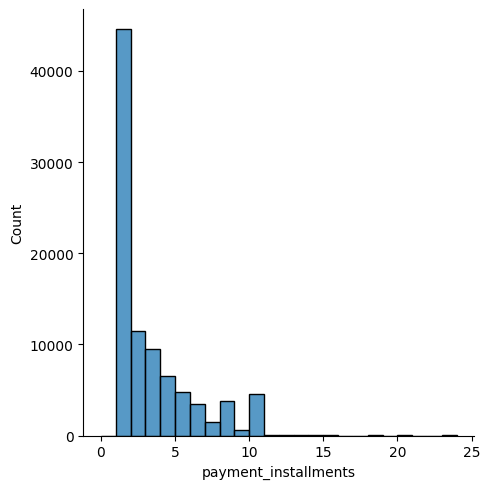

In [179]:
sns.displot(df_installments, x="payment_installments", binwidth=1)

1     56291
2     13122
3     11276
4      7673
10     6582
5      5788
8      4874
6      4436
7      1727
9       692
12      161
15       88
18       38
24       34
11       22
20       19
13       18
14       15
17        7
16        7
21        6
0         3
23        1
22        1
Name: payment_installments, dtype: int64


<Axes: title={'center': 'Distribution de la moyenne du nombre de versement par client'}, ylabel='payment_installments'>

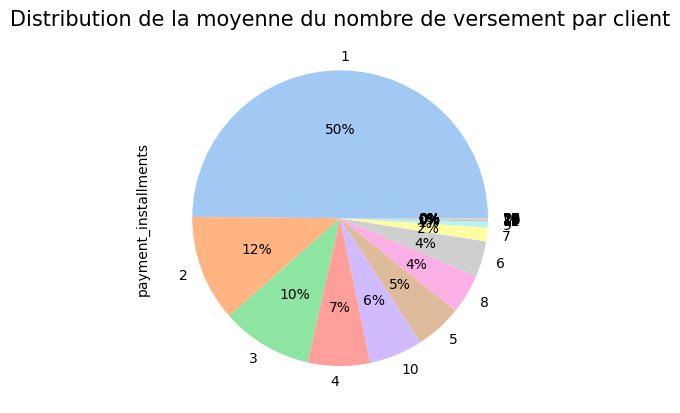

In [180]:
reviews = c2.loc[:,'payment_installments']

# series of counts
review_count = reviews.value_counts()
# print the counts
print(review_count)
plt.title('Distribution de la moyenne du nombre de versement par client', fontsize = 15)

review_count.plot(kind='pie', colors = sns.color_palette('pastel'), autopct='%.0f%%')

# Freight Ratio <a class="anchor" id='section_1_7' ></a>

In [181]:
c2['Freight_ratio'] = c2['freight_value'] / c2['price']
df_freight = c2.groupby(['customer_unique_id']).agg({'Freight_ratio' : lambda x: x.mean()})
df_freight.describe()

,Freight_ratio
count,91233.000000
mean,0.309017
std,0.313136
min,0.000000
25%,0.133088
50%,0.225316
75%,0.382000
max,21.447059


In [182]:
# Add a value to all for the log transformation

#df_freight = df_freight.Freight_ratio + 1
df_freight

,Freight_ratio
customer_unique_id,
0000366f3b9a7992bf8c76cfdf3221e2,0.092379
0000b849f77a49e4a4ce2b2a4ca5be3f,0.438624
0000f46a3911fa3c0805444483337064,0.249565
0000f6ccb0745a6a4b88665a16c9f078,0.678338
0004aac84e0df4da2b147fca70cf8255,0.093833
...,...
fffcf5a5ff07b0908bd4e2dbc735a684,0.320939
fffea47cd6d3cc0a88bd621562a9d061,0.303437
ffff371b4d645b6ecea244b27531430a,0.250945


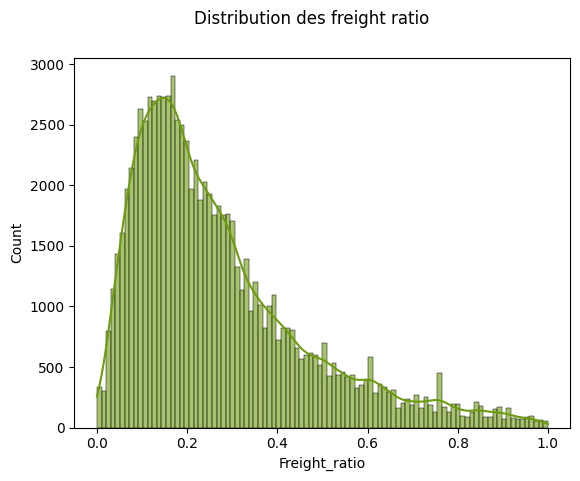

In [183]:
sns.histplot(
    data=df_freight[(df_freight["Freight_ratio"] < 1)],
    x="Freight_ratio",
    kde=True,
    color="#6D9C0E",
    alpha=0.6,
)

plt.suptitle("Distribution des freight ratio ")
plt.show()

# Quantity of items per order<a class="anchor" id='section_1_8' ></a>

In [214]:
df_qty_per_order = c2.groupby(["customer_unique_id", "order_id"])\
                        .agg({"order_item_id": "count"})
df_qty_per_order.describe()

,order_item_id
count,94227.000000
mean,1.197969
std,0.745821
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,63.000000


In [215]:
df_qty_per_order = df_qty_per_order.groupby("customer_unique_id")\
                        .agg({"order_item_id": "mean"})
df_qty_per_order.describe()

,order_item_id
count,91233.000000
mean,1.191654
std,0.706728
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,38.000000


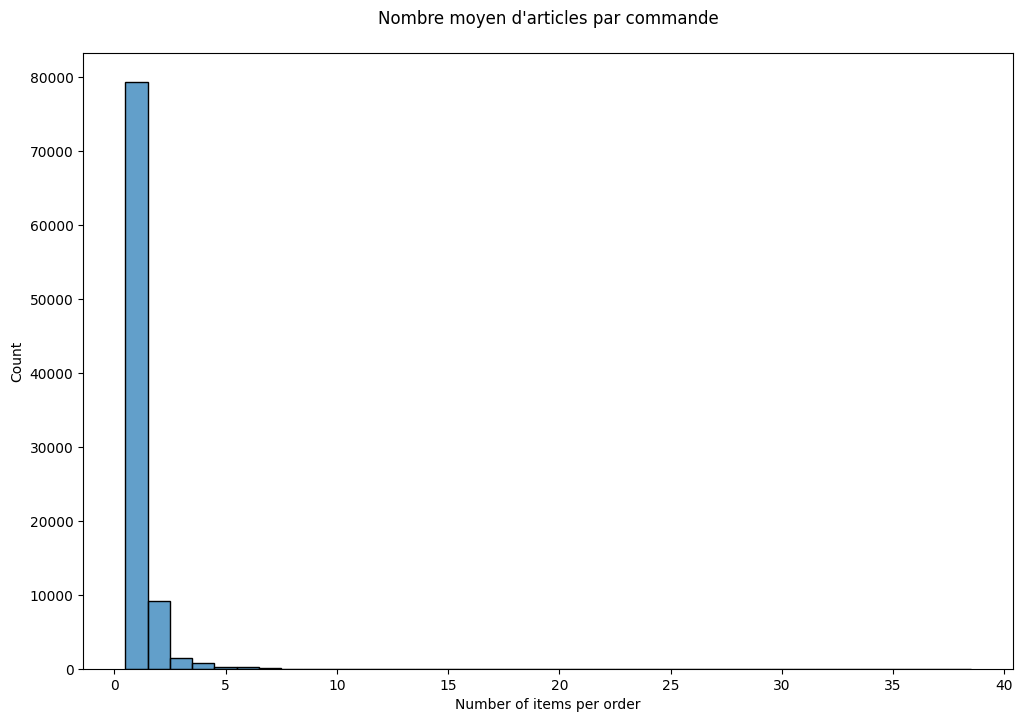

In [184]:
df_qty_per_order = c2.groupby(["customer_unique_id", "order_id"])\
                        .agg({"order_item_id": "count"})
df_qty_per_order = df_qty_per_order.groupby("customer_unique_id")\
                        .agg({"order_item_id": "mean"})

df_qty_per_order.rename(columns = {'order_item_id': 'Item_per_order'}, inplace = True)

# Plot density of number items in order
fig = plt.figure(figsize=(12, 8))
sns.histplot(data = df_qty_per_order,
             x="Item_per_order",
             discrete=True,
             edgecolor="black",
             alpha=0.7)
plt.xlabel("Number of items per order")
plt.title(f"Nombre moyen d'articles par commande\n")
plt.show()

1.000000     79219
2.000000      8606
3.000000      1377
4.000000       690
1.500000       532
6.000000       236
5.000000       219
2.500000        65
7.000000        43
1.666667        37
1.333333        37
8.000000        25
12.000000       19
3.500000        16
10.000000       14
9.000000        10
11.000000        9
4.500000         8
1.250000         7
5.500000         6
2.333333         5
14.000000        5
2.666667         4
15.000000        4
24.000000        4
3.333333         3
13.000000        3
21.000000        3
2.250000         2
1.200000         2
20.000000        2
1.800000         2
1.750000         2
1.555556         1
4.666667         1
7.500000         1
1.833333         1
1.714286         1
6.500000         1
3.666667         1
37.500000        1
19.000000        1
1.428571         1
38.000000        1
16.000000        1
22.000000        1
1.285714         1
1.400000         1
26.000000        1
17.500000        1
Name: Item_per_order, dtype: int64


<Axes: title={'center': 'Distribution par quantité darticle par commande'}, ylabel='Item_per_order'>

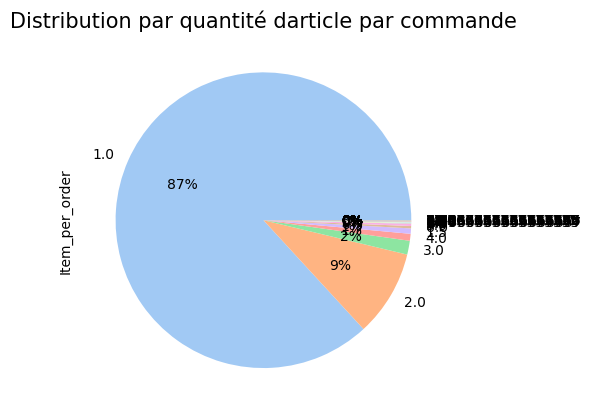

In [185]:
Item_per_order = df_qty_per_order.loc[:,'Item_per_order']

# series of counts
Item_per_order_count = Item_per_order.value_counts()
# print the counts
print(Item_per_order_count)
plt.title('Distribution par quantité darticle par commande', fontsize = 15)

Item_per_order_count.plot(kind='pie', colors = sns.color_palette('pastel'), autopct='%.0f%%')


# Product categories <a class="anchor" id='section_1_9' ></a>


In [186]:
#Regrouping all categories within 11 categories of product

product_categories_dict = {
    'construction_tools_construction': 'construction',
    'construction_tools_lights': 'construction',
    'construction_tools_safety': 'construction',
    'costruction_tools_garden': 'construction',
    'costruction_tools_tools': 'construction',
    'garden_tools': 'construction',
    'home_construction': 'construction',

    'fashio_female_clothing': 'fashion',
    'fashion_bags_accessories': 'fashion',
    'fashion_childrens_clothes': 'fashion',
    'fashion_male_clothing': 'fashion',
    'fashion_shoes': 'fashion',
    'fashion_sport': 'fashion',
    'fashion_underwear_beach': 'fashion',

    'furniture_bedroom': 'furniture',
    'furniture_decor': 'furniture',
    'furniture_living_room': 'furniture',
    'furniture_mattress_and_upholstery': 'furniture',
    'bed_bath_table': 'furniture',
    'kitchen_dining_laundry_garden_furniture': 'furniture',
    'office_furniture': 'furniture',

    'home_appliances': 'home',
    'home_appliances_2': 'home',
    'home_comfort_2': 'home',
    'home_confort': 'home',
    'air_conditioning': 'home',
    'housewares': 'home',
    'art': 'home',
    'arts_and_craftmanship': 'home',
    'flowers': 'home',
    'cool_stuff': 'home',

    'drinks': 'food_drink',
    'food': 'food_drink',
    'food_drink': 'food_drink',
    'la_cuisine': 'food_drink',

    'electronics': 'electronics',
    'audio': 'electronics',
    'tablets_printing_image': 'electronics',
    'telephony': 'electronics',
    'fixed_telephony': 'electronics',
    'small_appliances': 'electronics',
    'small_appliances_home_oven_and_coffee': 'electronics',
    'computers_accessories': 'electronics',
    'computers': 'electronics',

    'sports_leisure': 'sports_leisure',
    'consoles_games': 'sports_leisure',
    'musical_instruments': 'sports_leisure',
    'toys': 'sports_leisure',
    'cine_photo': 'sports_leisure',
    'dvds_blu_ray': 'sports_leisure',
    'cds_dvds_musicals': 'sports_leisure',
    'music': 'sports_leisure',
    'books_general_interest': 'sports_leisure',
    'books_imported': 'sports_leisure',
    'books_technical': 'sports_leisure',

    'health_beauty': 'health_beauty',
    'perfumery': 'health_beauty',
    'diapers_and_hygiene': 'health_beauty',
    'baby': 'health_beauty',

    'christmas_supplies': 'supplies',
    'stationery': 'supplies',
    'party_supplies': 'supplies',
    'auto': 'supplies',
    'luggage_accessories': 'supplies',

    'watches_gifts': 'gifts',

    'agro_industry_and_commerce': 'misc',
    'industry_commerce_and_business': 'misc',
    'security_and_services': 'misc',
    'signaling_and_security': 'misc',
    'market_place': 'misc',
    'pet_shop': 'misc'}

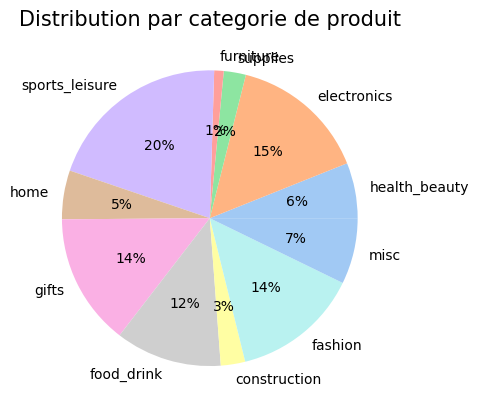

In [187]:
#Distribution of product categories

c2 = c2.reset_index()
c2['product_category'] = c2['product_category_name_english'].map(product_categories_dict)
category_df = c2.loc[:,['customer_unique_id','product_category']]
categories = category_df.groupby('product_category').size()
label=list(c2.product_category.values)
plt.title('Distribution par categorie de produit', fontsize = 15)
plt.pie(categories,labels=c2['product_category'].unique(), colors = sns.color_palette('pastel'), autopct='%.0f%%')
plt.show()

In [188]:
#encoding the categories with OHE technique

category_df_ohe = category_df['product_category'].str.get_dummies().max(level=0)
df_cat = pd.concat([category_df_ohe,category_df], axis=1).set_index('customer_unique_id')
df_cat_grouped = df_cat.groupby(['customer_unique_id']).max()
df_cat_grouped = df_cat_grouped.drop('product_category', axis=1)
df_cat_grouped

/var/folders/gs/0bx6d0ms3jxfgjd6vfkz22l40000gn/T/ipykernel_742/2762218.py:3: FutureWarning:

Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().



,construction,electronics,fashion,food_drink,furniture,gifts,health_beauty,home,misc,sports_leisure,supplies
customer_unique_id,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,0,0,0,0,1,0,0,0,0,0,0
0000b849f77a49e4a4ce2b2a4ca5be3f,0,0,0,0,0,0,1,0,0,0,0
0000f46a3911fa3c0805444483337064,0,0,0,0,0,0,0,0,0,0,1
0000f6ccb0745a6a4b88665a16c9f078,0,1,0,0,0,0,0,0,0,0,0
0004aac84e0df4da2b147fca70cf8255,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,0,0,0,0,0,0,1,0,0,0,0
fffea47cd6d3cc0a88bd621562a9d061,0,0,0,0,0,0,1,0,0,0,0
ffff371b4d645b6ecea244b27531430a,0,0,0,0,0,0,0,0,0,0,1


# Merge and export datasets <a class="anchor" id='chapter_2' ></a>


In [202]:
df_freight

,Freight_ratio
customer_unique_id,
0000366f3b9a7992bf8c76cfdf3221e2,0.092379
0000b849f77a49e4a4ce2b2a4ca5be3f,0.438624
0000f46a3911fa3c0805444483337064,0.249565
0000f6ccb0745a6a4b88665a16c9f078,0.678338
0004aac84e0df4da2b147fca70cf8255,0.093833
...,...
fffcf5a5ff07b0908bd4e2dbc735a684,0.320939
fffea47cd6d3cc0a88bd621562a9d061,0.303437
ffff371b4d645b6ecea244b27531430a,0.250945


In [203]:
# Regrouping all features within the same dataset

RFM_df = RFM_df.set_index('customer_unique_id')
df_final = pd.concat([df_score,RFM_df,delivery_df,df_installments,df_qty_per_order,df_cat_grouped,df_freight, df_haversine], axis = 1)
df_final.columns

Index(['review_score', 'Recency', 'Frequency', 'Monetary', 'R', 'F', 'M',
       'RFM_Segment', 'RFM_Score', 'Title', 'time_delivery',
       'payment_installments', 'Item_per_order', 'construction', 'electronics',
       'fashion', 'food_drink', 'furniture', 'gifts', 'health_beauty', 'home',
       'misc', 'sports_leisure', 'supplies', 'Freight_ratio',
       'haversine_distance'],
      dtype='object')

<Axes: >

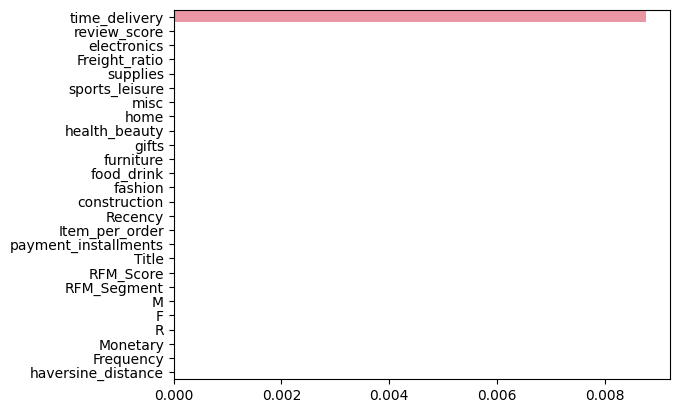

In [204]:
data_nan = df_final.isna().sum().sort_values(ascending=False)

sns.barplot(x=data_nan.values /df_final.shape[0]*100, y = data_nan.index)

In [205]:
df_final = df_final.dropna()
df_final

,review_score,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score,Title,...,food_drink,furniture,gifts,health_beauty,home,misc,sports_leisure,supplies,Freight_ratio,haversine_distance
customer_unique_id,,,,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,5.0,112,1,129.90,3,1,2,312,6,new_customers,...,0,1,0,0,0,0,0,0,0.092379,209.713834
0000b849f77a49e4a4ce2b2a4ca5be3f,4.0,115,1,18.90,3,1,1,311,5,new_customers,...,0,0,0,1,0,0,0,0,0.438624,209.713834
0000f46a3911fa3c0805444483337064,3.0,537,1,69.00,1,1,2,112,4,lost_occasionnal,...,0,0,0,0,0,0,0,1,0.249565,125.363853
0000f6ccb0745a6a4b88665a16c9f078,4.0,321,1,25.99,1,1,1,111,3,lost_occasionnal,...,0,0,0,0,0,0,0,0,0.678338,1574.231129
0004aac84e0df4da2b147fca70cf8255,5.0,288,1,180.00,2,1,3,213,6,sleeping_big_wallet,...,0,0,0,0,0,0,0,0,0.093833,209.713834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,5.0,447,2,1570.00,1,2,3,123,6,lost_loyal,...,0,0,0,1,0,0,0,0,0.320939,1486.897041
fffea47cd6d3cc0a88bd621562a9d061,4.0,262,1,64.89,2,1,2,212,5,need_attention,...,0,0,0,1,0,0,0,0,0.303437,1063.469329
ffff371b4d645b6ecea244b27531430a,5.0,568,1,89.90,1,1,2,112,4,lost_occasionnal,...,0,0,0,0,0,0,0,1,0.250945,882.561907


/var/folders/gs/0bx6d0ms3jxfgjd6vfkz22l40000gn/T/ipykernel_742/698982949.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

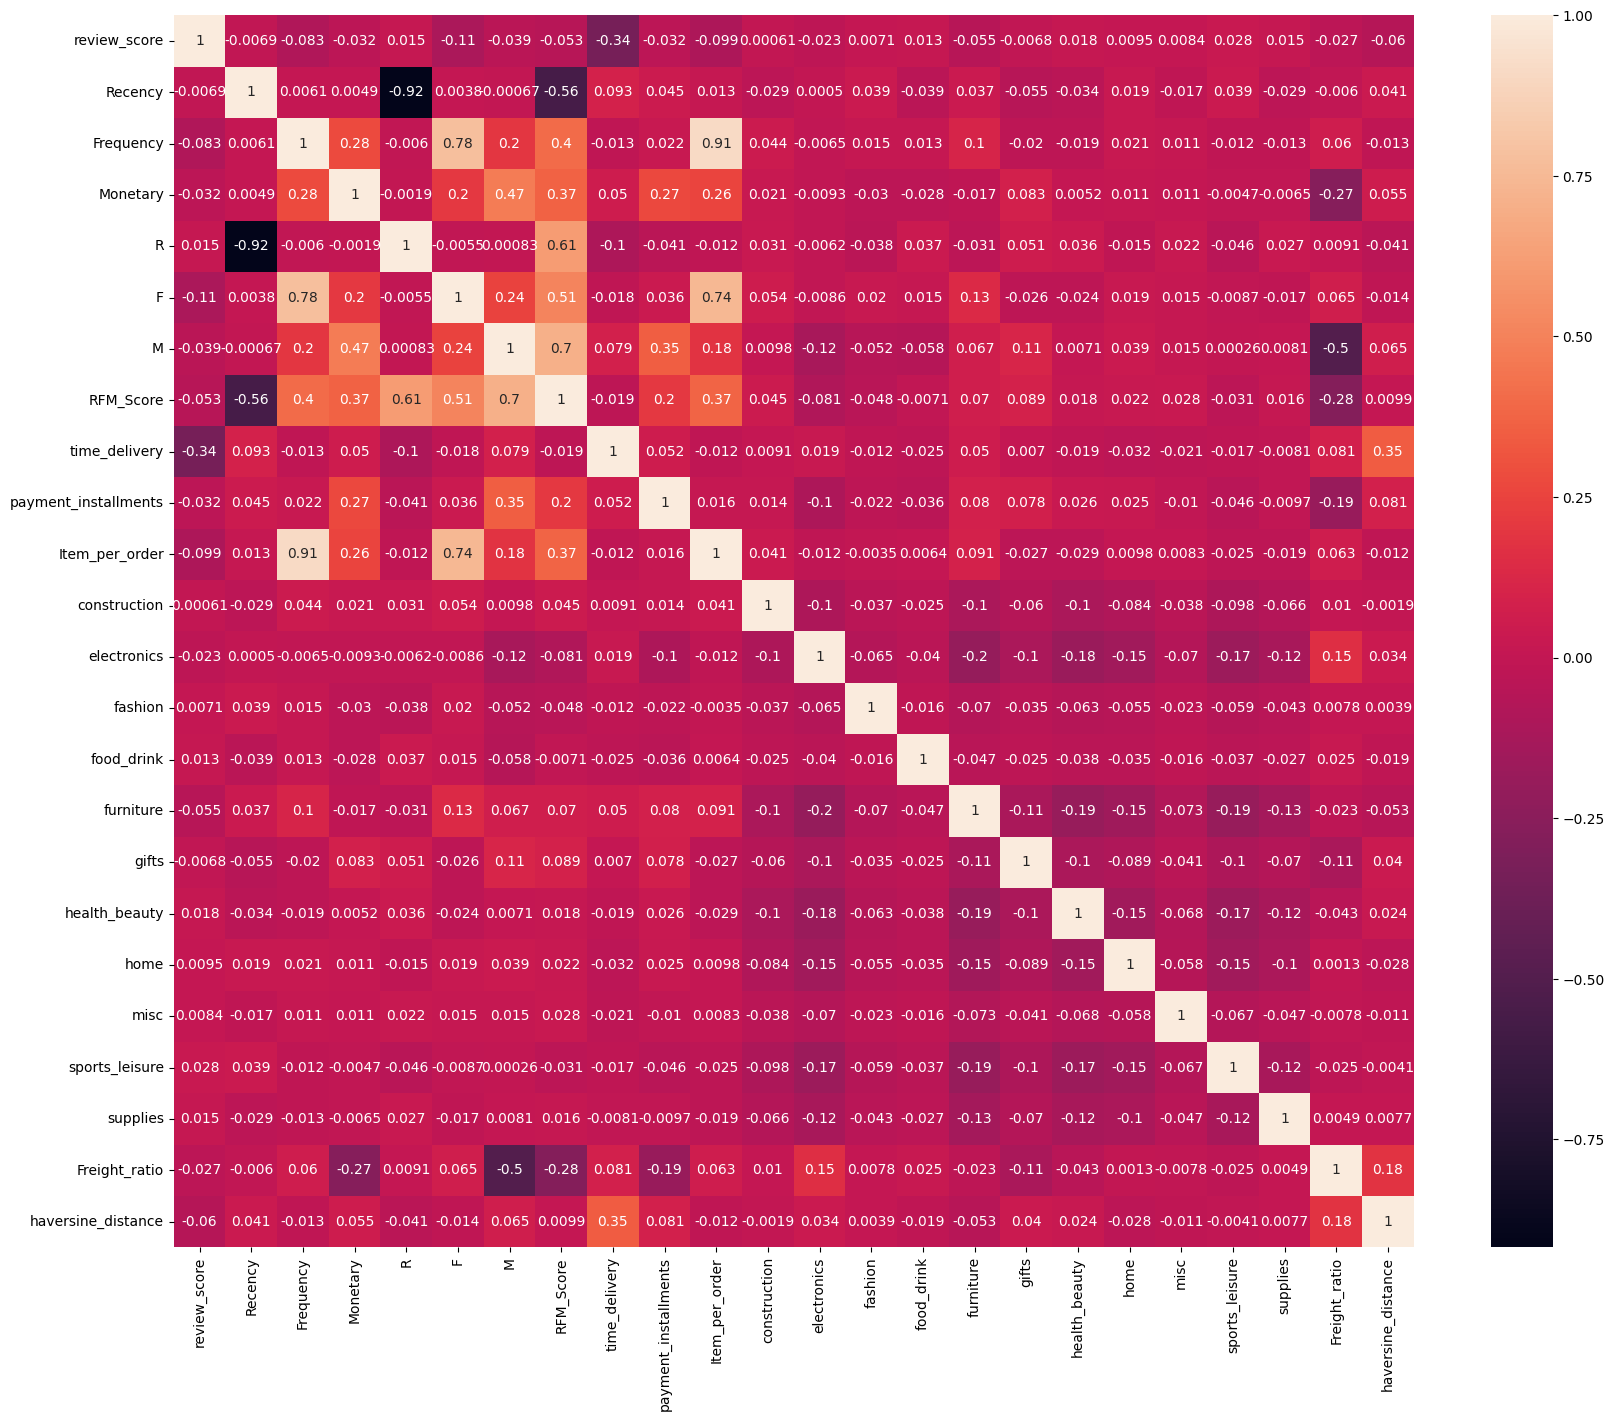

In [206]:
cor = df_final.corr()
plt.figure(figsize=(20, 16))
sns.heatmap(data=cor, annot=True)

In [207]:
# We can see a positive correlation between order_item_id and frequency and M


In [208]:
data_nan = df_final.isna().sum().sort_values(ascending=False)

#sns.barplot(x=data_nan.values /df_final.shape[0]*100, y = data_nan.index)


In [209]:
df_final.to_csv("df_modelisation.csv")


In [255]:
c2.to_csv("df_maintenance_noFE.csv")


In [164]:
df_purchase = d2.loc[:,['customer_unique_id', 'Purchase_Month']]
df_purchase

,customer_unique_id,Purchase_Month
0,871766c5855e863f6eccc05f988b23cb,2017-09-01
1,eb28e67c4c0b83846050ddfb8a35d051,2017-04-01
2,3818d81c6709e39d06b2738a8d3a2474,2018-01-01
3,af861d436cfc08b2c2ddefd0ba074622,2018-08-01
4,64b576fb70d441e8f1b2d7d446e483c5,2017-02-01
...,...,...
112645,0c9aeda10a71f369396d0c04dce13a64,2018-04-01
112646,0da9fe112eae0c74d3ba1fe16de0988b,2018-07-01
112647,cd79b407828f02fdbba457111c38e4c4,2017-10-01
112648,eb803377c9315b564bdedad672039306,2017-08-01


In [277]:
#df_purchase = df_purchase.set_index('customer_unique_id')

#RFM_df = RFM_df.set_index('customer_unique_id')
df_stab = pd.concat([df_score,RFM_df,delivery_df, df_purchase], axis = 1)
df_stab

InvalidIndexError: Reindexing only valid with uniquely valued Index objects